In [1]:
import os
import zipfile

local_zip = '/data/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

local_zip = '/data/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/data/')
zip_ref.close()

In [2]:
laptop_dir = os.path.join('/data/train/laptop')
phone_dir = os.path.join('/data/train/phone')

test_laptop_dir = os.path.join('/data/test/laptop')
test_phone_dir = os.path.join('/data/test/phone')

print('total training laptop images:', len(os.listdir(laptop_dir)))
print('total training phone images:', len(os.listdir(phone_dir)))

print('total test laptop images:', len(os.listdir(test_laptop_dir)))
print('total test phone images:', len(os.listdir(test_phone_dir)))

laptop_files = os.listdir(laptop_dir)
phone_files = os.listdir(phone_dir)

total training laptop images: 601
total training phone images: 601
total test laptop images: 240
total test phone images: 240


In [3]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications.vgg19 import VGG19

In [4]:
train_datagen = ImageDataGenerator(vertical_flip=True,
                               horizontal_flip=True,
                               height_shift_range=0.1,
                               width_shift_range=0.1)

train_generator = train_datagen.flow_from_directory(
	"/data/train/",
    target_size=(180, 180),
    batch_size = 32)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	"/data/test/",
	target_size=(180,180),
	class_mode='categorical',
  batch_size=32)

Found 1200 images belonging to 2 classes.
Found 480 images belonging to 2 classes.


In [5]:
base_model_vgg19 = VGG19(
   weights = 'imagenet',
   input_shape=(180, 180, 3),
   include_top=False)

for layer in base_model_vgg19.layers:
    layer.trainable = False
    
model_vgg19 = Sequential()
model_vgg19.add(base_model_vgg19)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(1,activation='sigmoid'))
model_vgg19.summary()

model_vgg19.compile(loss='categorical_crossentropy', optimizer='rmsprop' ,metrics=['accuracy'])
history = model_vgg19.fit(train_generator,
                   steps_per_epoch=10,
                   epochs=5,
                   verbose=1,
                   validation_steps=2,
                   batch_size=75,
                   validation_data = validation_generator)

80150528/80134624 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 5, 5, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 1)                 12801     
                                                                 
Total params: 20,037,185
Trainable params: 12,801
Non-trainable params: 20,024,384
_________________________________________________________________
Epoch 1/5
10/10 [==============================] - 22s 566ms/step - loss: 0.2549 - accuracy: 0.8832 - val_loss: 0.3846 - val_accuracy: 0.7500
Epoch 2/5
10/10 [==============================] - 5s 449ms/step - loss: 0.0283 - accuracy: 0.93

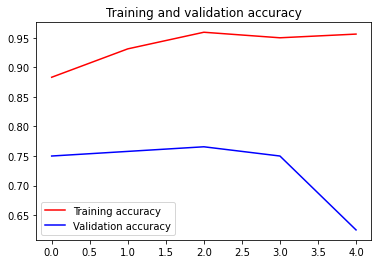

<Figure size 432x288 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()